# OUTLIERS
***

## Exercise 1
Create box plots on a single set of axes for all five experiments in the morley data set.

In [1]:
# Numerical arrays.
import numpy as np

# Plotting.
import matplotlib.pyplot as plt

# Statistics.
import pandas as pd

In [2]:
# Read in the morley data.
data = np.genfromtxt('data/morley.csv', skip_header=1, delimiter=',', deletechars='"')

# Remove the first column.
data = data[:,1:]

In [3]:
# A quick way to get the five experiments in different columns.
df = data[:,2].reshape(5, 20).T

panda_df = pd.DataFrame(data = df, 
                        columns = ["Col_1", "Col_2", "Col_3", "Col_4", "Col_5"])
print(panda_df)

     Col_1  Col_2  Col_3  Col_4  Col_5
0    850.0  960.0  880.0  890.0  890.0
1    740.0  940.0  880.0  810.0  840.0
2    900.0  960.0  880.0  810.0  780.0
3   1070.0  940.0  860.0  820.0  810.0
4    930.0  880.0  720.0  800.0  760.0
5    850.0  800.0  720.0  770.0  810.0
6    950.0  850.0  620.0  760.0  790.0
7    980.0  880.0  860.0  740.0  810.0
8    980.0  900.0  970.0  750.0  820.0
9    880.0  840.0  950.0  760.0  850.0
10  1000.0  830.0  880.0  910.0  870.0
11   980.0  790.0  910.0  920.0  870.0
12   930.0  810.0  850.0  890.0  810.0
13   650.0  880.0  870.0  860.0  740.0
14   760.0  880.0  840.0  880.0  810.0
15   810.0  830.0  840.0  720.0  940.0
16  1000.0  800.0  850.0  840.0  950.0
17  1000.0  790.0  840.0  850.0  800.0
18   960.0  760.0  840.0  850.0  810.0
19   960.0  800.0  840.0  780.0  870.0


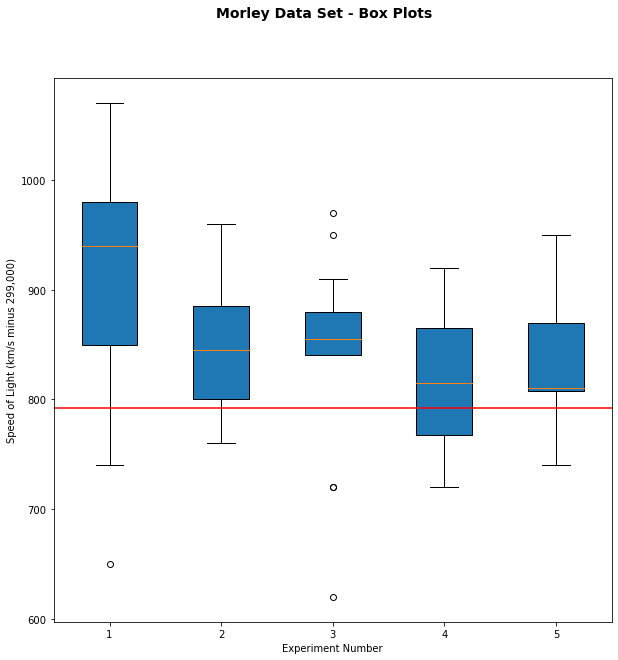

In [14]:
# figure related code from https://stackoverflow.com/questions/31842892/how-to-add-labels-to-a-boxplot-figure-pylab
fig = plt.figure(figsize = (10, 10))
fig.suptitle('Morley Data Set - Box Plots', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
ax.boxplot(panda_df, patch_artist=True) # for colour

plt.axhline(y = 792.458, color = 'r', linestyle = '-', label='Speed') # the speed of light = 299792458m/s
ax.set_xlabel('Experiment Number')
ax.set_ylabel('Speed of Light (km/s minus 299,000)')

plt.show()

### References: 
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html
https://www.geeksforgeeks.org/create-a-pandas-dataframe-from-a-numpy-array-and-specify-the-index-column-and-column-headers/
https://commons.wikimedia.org/wiki/File:Michelsonmorley-boxplot.svg

## Exercise 2
Create box plots for all of the numercial variables in Fisher's Iris Data Set.

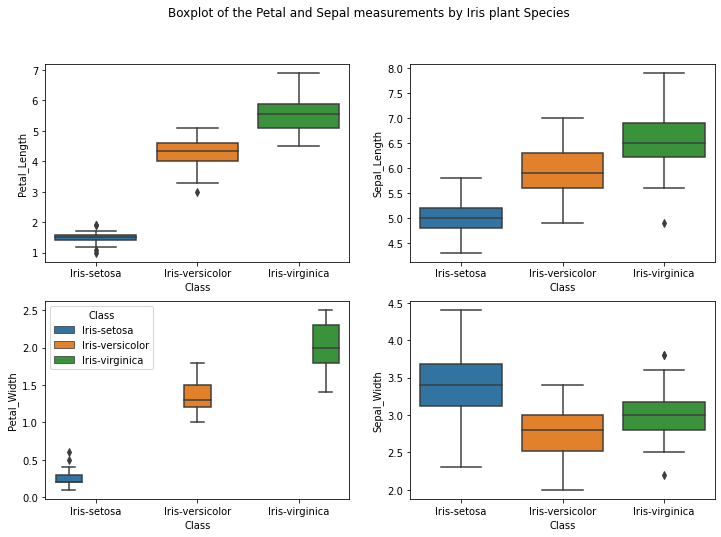

In [5]:
import seaborn as sns # for data visualisation

# pass the url for the Iris data set as a variable
csv_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

# passing column names as they aren't already included
col_names = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Class']

# read in my data
iris =  pd.read_csv(csv_url, names = col_names)

# 2 x 2 grid, fig size set, y axis not shared between plots
f, axes = plt.subplots(2, 2, sharey=False, figsize = (12, 8)) 

# passing class and petal/sepal length measurements as my x and y parameters and location in grid
sns.boxplot(x="Class", y="Sepal_Length", data=iris, ax=axes[0,1])
sns.boxplot(x="Class", y="Sepal_Width", data=iris, ax=axes[1,1])
sns.boxplot(x="Class", y="Petal_Length",data=iris, ax = axes[0,0])
sns.boxplot(x="Class", y="Petal_Width",hue = "Class",data=iris, ax=axes[1,0])

# Add a title
f.suptitle("Boxplot of the Petal and Sepal measurements by Iris plant Species");


## Exercise 3
Adapt Ian's code and plots so that the overall plot is inversely propertional and the individual groups are directly proportional.

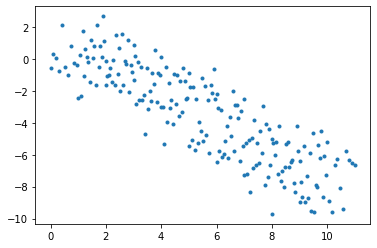

In [6]:
# Create a series of x vectors.
xs = np.array([np.linspace(i, i + 2.0, 20) for i in range(10)])

# Create a corresponding series of y vectors.   
# ys = np.array([-1.0 * xs[i] + 2 * i for i in range(len(xs))]) I have commented out Ian's original code
ys = np.array([1.0 * xs[i] - 2 * i for i in range(len(xs))]) # changed '-' to '+' and vice versa

# Add some noise.
ys = ys + np.random.normal(0.0, 1.0, ys.shape)

# Create global list of x and y values.
x = xs.flatten()
y = ys.flatten()

# Plot.
plt.plot(x, y, '.');

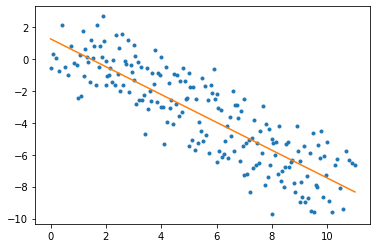

In [7]:
# Best fit line slope and y intercept.
m, c = np.polyfit(x, y, 1)

# Create a steadily increasing x range for plotting.
xbestfit = np.linspace(x.min(), x.max(), 1000)
# Create corresponding y values form best fit line.
ybestfit = m * xbestfit + c

# Plot points.
plt.plot(x, y, '.')

# Plot line.
plt.plot(xbestfit, ybestfit);


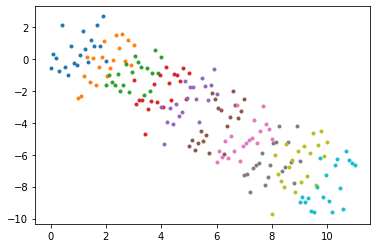

In [8]:
# Plot the same points, but now with a different colour for each range.
for i in range(len(xs)):
    plt.plot(xs[i], ys[i], '.')

    

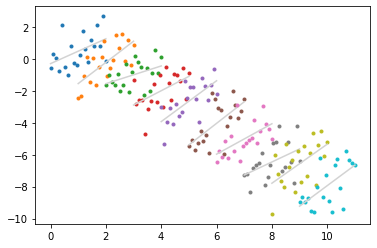

In [9]:
# Same plot but with best fit lines for each category.
for i in range(len(xs)):
    # Plot this category.
    plt.plot(xs[i], ys[i], '.')
    # Fit line to category.
    m, c = np.polyfit(xs[i], ys[i], 1)
    # Create steadily increasing x range for plot.
    xbestfit = np.linspace(xs[i].min(), xs[i].max(), 50)
    # Corresponding y values based on best fit line.
    ybestfit = m * xbestfit + c
    # Plot best fit line for category.
    plt.plot(xbestfit, ybestfit, color='lightgrey');